In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Датасет очень большой, поэтому пути до аудио файлов хранятся в json формате. Считываю их и преобразую в удобный pandas dataframe.

In [7]:
with open("Z:/python_project/course_work_stepanov/crowd_train/raw_crowd_train.jsonl", "r") as file:
    lines = file.read().splitlines()

In [8]:
dicts = [eval(x.replace('NaN', 'np.nan')) for x in lines]

In [9]:
df = pd.DataFrame.from_records(dicts)

In [10]:
df.shape

(906953, 9)

Удалив дубликаты по тексту в сообщении, датасет уменьшился в 7 раз...

In [11]:
df_not_dupl = df.drop_duplicates(subset="speaker_text")
df_not_dupl.shape

(124569, 9)

In [49]:
df_not_dupl.to_parquet('crowd_train_without_duplicates.pqt')

In [28]:
res = df_not_dupl.source_id.value_counts()

Как видно, количество сообщений от пользователей сильно разнится. Для того, чтобы не столкнуться с дизбалансом классов, я буду использовать функцию get_dataframe в файлe my_funcs.py

<Axes: xlabel='source_id', ylabel='count'>

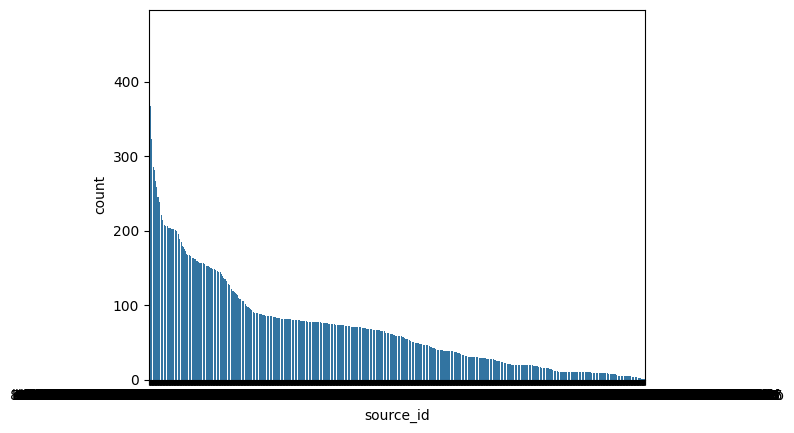

In [21]:
sns.barplot(res)

Удаляю ненужные мне столбцы и сохраняю датафрейм

In [36]:
df_final = df_not_dupl.drop(columns=['hash_id', 'annotator_emo',
                            'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo']).dropna()
df_final = df_final[df_final.source_id.isin(res.index)]
df_final.shape

(124449, 3)

In [37]:
df_final.to_parquet("crowd_train_eda.pqt", index=False)